In [38]:
# cell 1
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# set nicer display
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 200)

# path
CSV_IN = "../data/benin-malanville.csv"   # change if needed
CSV_OUT = "../data/benin_clean.csv"


In [32]:
# cell 2 - load
df = pd.read_csv(CSV_IN)
print("shape:", df.shape)
df.head()


shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [33]:
# cell 3 - basic profiling
print("Columns:", list(df.columns))
display(df.info())
display(df.describe(include='all').T)

# missing-value report
na_counts = df.isna().sum()
na_pct = (na_counts / len(df)) * 100
missing = pd.DataFrame({"n_missing": na_counts, "pct_missing": na_pct}).sort_values("pct_missing", ascending=False)
display(missing)

# list columns with >5% nulls
print("Columns with >5% nulls:")
display(missing[missing["pct_missing"] > 5])


Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,525600,525600,2021-08-09 00:01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GHI,525600.0,NaN,NaN,NaN,240.559452,331.131327,-12.9,-2.0,1.8,483.4,1413.0
DNI,525600.0,NaN,NaN,NaN,167.187516,261.710501,-7.8,-0.5,-0.1,314.2,952.3
DHI,525600.0,NaN,NaN,NaN,115.358961,158.691074,-12.6,-2.1,1.6,216.3,759.2
ModA,525600.0,NaN,NaN,NaN,236.589496,326.894859,0.0,0.0,4.5,463.7,1342.3
ModB,525600.0,NaN,NaN,NaN,228.883576,316.536515,0.0,0.0,4.3,447.9,1342.3
Tamb,525600.0,NaN,NaN,NaN,28.179683,5.924297,11.0,24.2,28.0,32.3,43.8
RH,525600.0,NaN,NaN,NaN,54.487969,28.073069,2.1,28.8,55.1,80.1,100.0
WS,525600.0,NaN,NaN,NaN,2.121113,1.603466,0.0,1.0,1.9,3.1,19.5
WSgust,525600.0,NaN,NaN,NaN,2.809195,2.02912,0.0,1.3,2.6,4.1,26.6


,n_missing,pct_missing
Comments,525600,100.0
GHI,0,0.0
Timestamp,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0


Columns with >5% nulls:


,n_missing,pct_missing
Comments,525600,100.0


In [34]:
# cell 4
# Convert Timestamp to datetime (coerce invalid -> NaT)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# forward-fill or drop rows with invalid timestamps depending on counts
print("invalid timestamps:", df['Timestamp'].isna().sum())
df['Timestamp'].fillna(method='ffill', inplace=True)  # or df.dropna(subset=['Timestamp'], inplace=True)

# keep an index if needed
df.sort_values('Timestamp', inplace=True)
df.reset_index(drop=True, inplace=True)


invalid timestamps: 0


C:\Users\hp\AppData\Local\Temp\ipykernel_12684\4227154437.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Timestamp'].fillna(method='ffill', inplace=True)  # or df.dropna(subset=['Timestamp'], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_12684\4227154437.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Timestamp'].fillna(method='ffill', inplace=True)  # or df.dropna(subset=['Timestamp'], inplace=True)


In [35]:
# cell 5
# Replace tiny negative sensor noise with 0 for irradiance and module outputs
irr_cols = ['GHI','DNI','DHI']
mod_cols = [c for c in df.columns if c.lower().startswith('mod') or c in ['ModA','ModB']]
other_nonneg = ['WS','WSgust','WSstdev','TModA','TModB']  # extend as needed

for c in irr_cols + mod_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').clip(lower=0)

# numeric conversion for other numeric-looking columns
num_cols = df.select_dtypes(exclude=['number']).columns
# we will specifically coerce known numeric columns:
to_numeric = ['Tamb','RH','WS','WSgust','WSstdev','WD','WDstdev','BP','Cleaning','Precipitation','TModA','TModB']
for c in to_numeric:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')


In [36]:
# cell 6
# Numeric median imputation for key sensor columns
key_numeric_cols = [c for c in ['GHI','DNI','DHI','ModA','ModB','WS','WSgust','Tamb','TModA','TModB','RH','BP'] if c in df.columns]
df[key_numeric_cols] = df[key_numeric_cols].fillna(df[key_numeric_cols].median())

# For timestamp we already did ffill. For Comments fill with 'Unknown' if present
if 'Comments' in df.columns:
    df['Comments'] = df['Comments'].fillna("Unknown")

# For Cleaning/Precipitation flags: fillna with 0 if missing
for c in ['Cleaning','Precipitation']:
    if c in df.columns:
        df[c] = df[c].fillna(0)


In [39]:
# cell 7
from scipy.stats import zscore

outlier_cols = [c for c in ['GHI','DNI','DHI','ModA','ModB','WS','WSgust'] if c in df.columns]
z = df[outlier_cols].apply(lambda x: stats.zscore(x, nan_policy='omit'))
# create boolean flags
for c in outlier_cols:
    df[f'{c}_z'] = np.abs(z[c])  # absolute z
    df[f'{c}_outlier'] = df[f'{c}_z'] > 3

# rows flagged for any outlier
df['any_outlier'] = df[[f'{c}_outlier' for c in outlier_cols]].any(axis=1)
print("Outlier counts per column:")
display({c: df[f'{c}_outlier'].sum() for c in outlier_cols})
print("Rows with any outlier:", df['any_outlier'].sum())


Outlier counts per column:


{'GHI': np.int64(90),
 'DNI': np.int64(2),
 'DHI': np.int64(3889),
 'ModA': np.int64(27),
 'ModB': np.int64(63),
 'WS': np.int64(3109),
 'WSgust': np.int64(3500)}

Rows with any outlier: 7893


In [40]:
# to replace outlier values with median
for c in outlier_cols:
    med = df[c].median()
    df.loc[df[f'{c}_outlier'], c] = med


In [41]:
# cell 8
df.to_csv(CSV_OUT, index=False)
print("Cleaned CSV written to", CSV_OUT)


Cleaned CSV written to ../data/benin_clean.csv


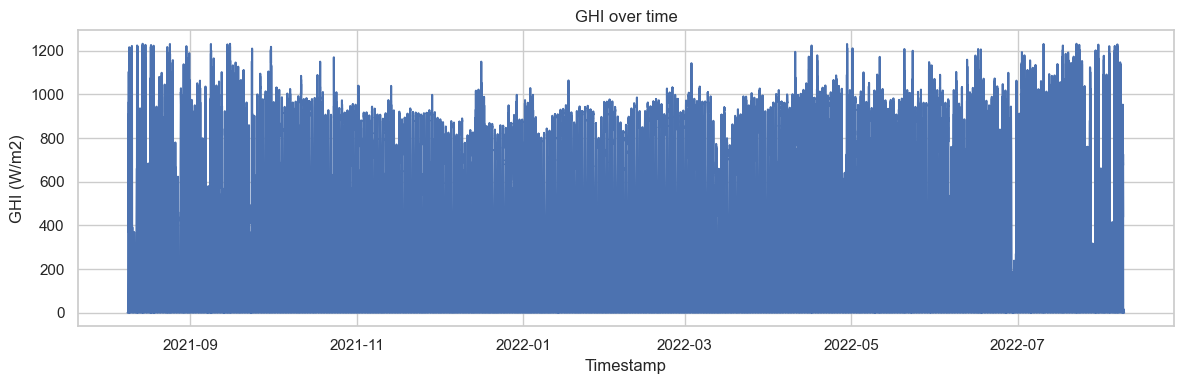

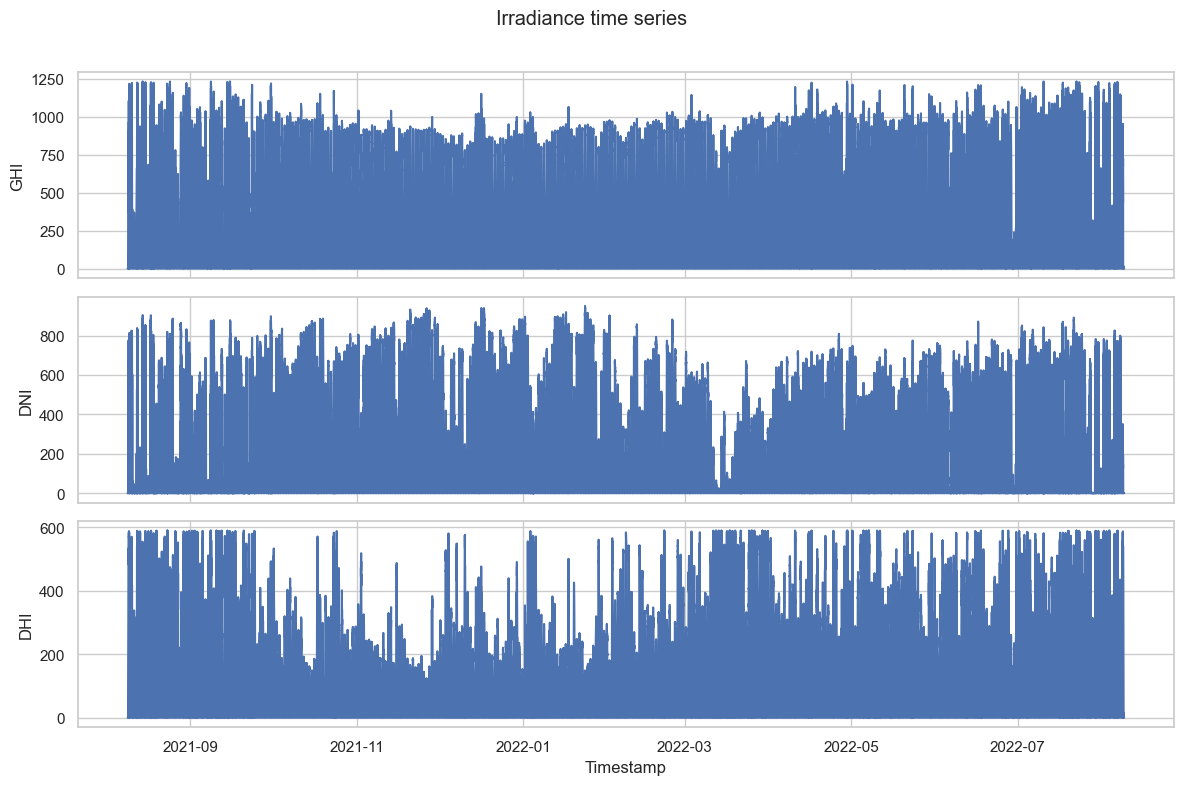

In [42]:
# cell 9
plt.figure(figsize=(12,4))
plt.plot(df['Timestamp'], df['GHI'])
plt.title("GHI over time")
plt.xlabel("Timestamp")
plt.ylabel("GHI (W/m2)")
plt.tight_layout()

# small multiples for GHI, DNI, DHI
fig, axs = plt.subplots(3,1, figsize=(12,8), sharex=True)
for ax, col in zip(axs, ['GHI','DNI','DHI']):
    if col in df.columns:
        ax.plot(df['Timestamp'], df[col])
        ax.set_ylabel(col)
plt.xlabel("Timestamp")
plt.suptitle("Irradiance time series")
plt.tight_layout(rect=[0,0,1,0.97])


Text(0.5, 1.0, 'Average GHI by month')

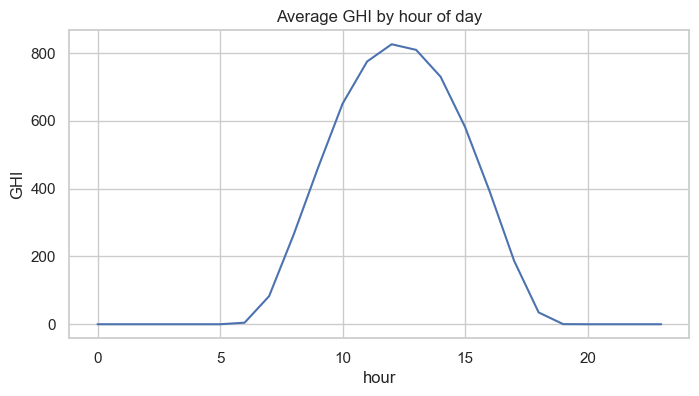

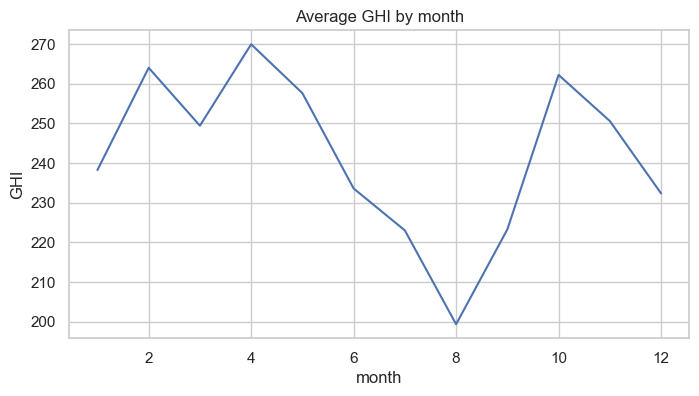

In [43]:
# cell 10
df['hour'] = df['Timestamp'].dt.hour
df['month'] = df['Timestamp'].dt.month

# hour-of-day average GHI
plt.figure(figsize=(8,4))
sns.lineplot(data=df.groupby('hour')['GHI'].mean().reset_index(), x='hour', y='GHI')
plt.title("Average GHI by hour of day")

# month pattern (mean)
plt.figure(figsize=(8,4))
sns.lineplot(data=df.groupby('month')['GHI'].mean().reset_index(), x='month', y='GHI')
plt.title("Average GHI by month")


,Cleaning,ModA,ModB
0,0,236.459225,228.669520
1,1,307.229278,301.972165


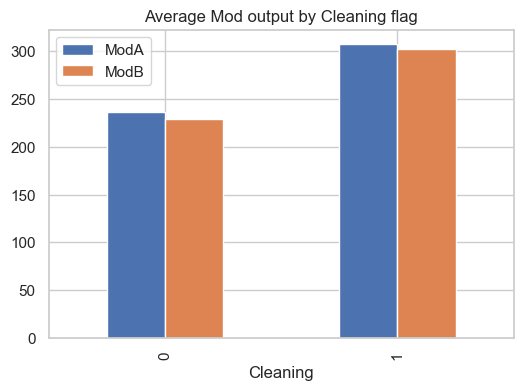

In [44]:
# cell 11
# assumes Cleaning is 0/1 flag
if 'Cleaning' in df.columns:
    grp = df.groupby('Cleaning')[['ModA','ModB']].mean().reset_index()
    display(grp)
    grp.plot(x='Cleaning', y=['ModA','ModB'], kind='bar', figsize=(6,4), title='Average Mod output by Cleaning flag')


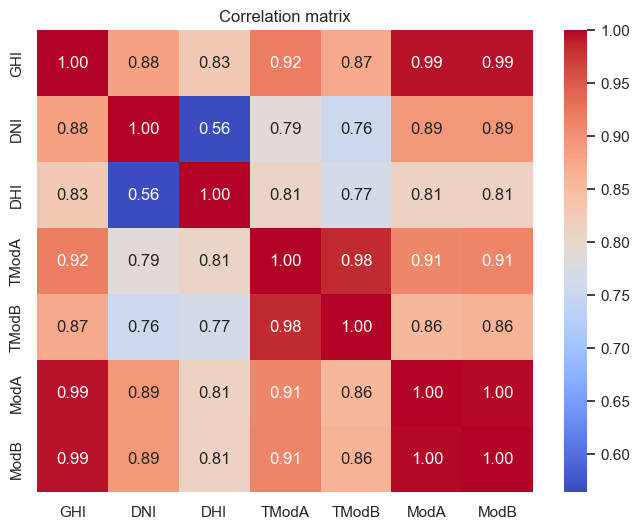

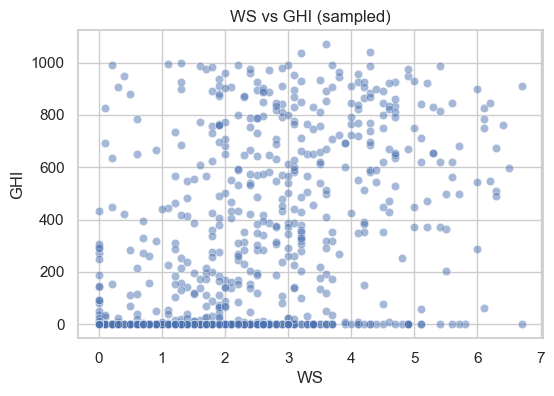

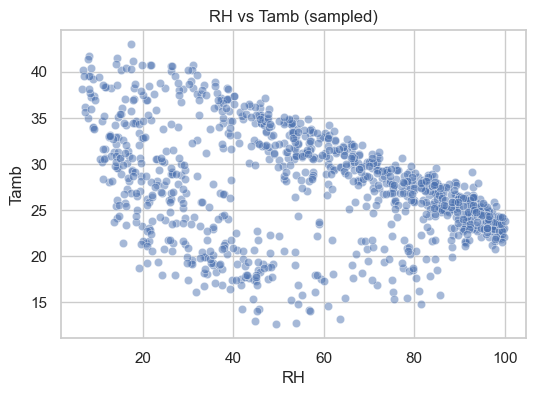

In [45]:
# cell 12
corr_cols = [c for c in ['GHI','DNI','DHI','TModA','TModB','ModA','ModB'] if c in df.columns]
plt.figure(figsize=(8,6))
sns.heatmap(df[corr_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation matrix")

# scatter examples
plt.figure(figsize=(6,4))
if 'WS' in df.columns:
    sns.scatterplot(data=df.sample(1000), x='WS', y='GHI', alpha=0.5)
    plt.title("WS vs GHI (sampled)")

if 'RH' in df.columns and 'Tamb' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df.sample(1000), x='RH', y='Tamb', alpha=0.5)
    plt.title("RH vs Tamb (sampled)")


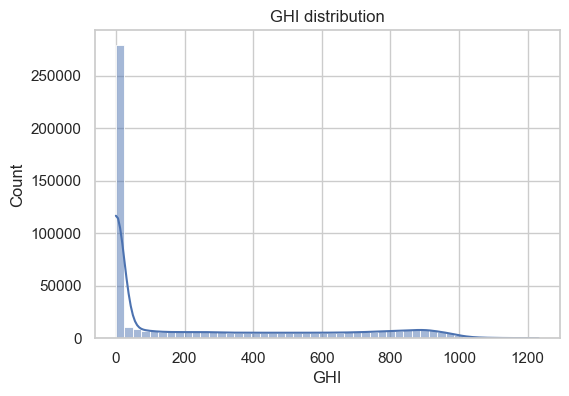

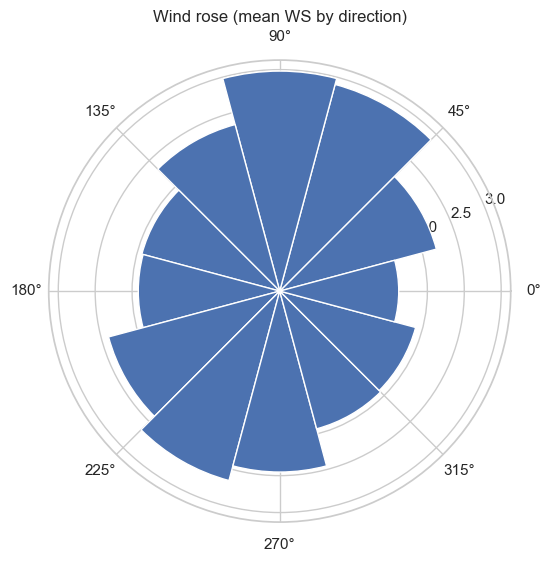

In [46]:
# cell 13 - histogram
plt.figure(figsize=(6,4))
sns.histplot(df['GHI'].clip(lower=0), bins=50, kde=True)
plt.title("GHI distribution")

# simple radial bar plot for wind (approximate wind rose)
if 'WD' in df.columns and 'WS' in df.columns:
    wind = df[['WD','WS']].dropna()
    # bucket wind directions
    wind['wd_bin'] = (np.floor(wind['WD'] / 30) * 30).astype(int)
    rose = wind.groupby('wd_bin')['WS'].mean().reset_index()
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, polar=True)
    angles = np.deg2rad(rose['wd_bin'])
    bars = ax.bar(angles, rose['WS'], width=np.deg2rad(30), align='center')
    ax.set_title("Wind rose (mean WS by direction)")


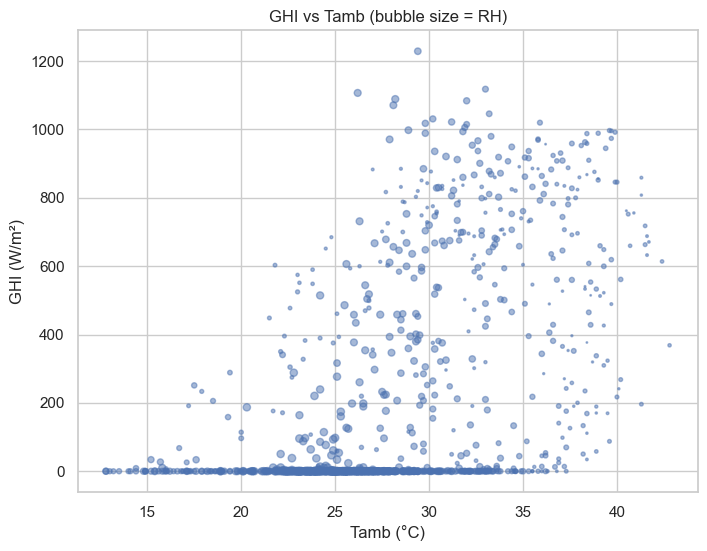

In [47]:
# cell 14
if {'GHI','Tamb','RH'}.issubset(df.columns):
    sub = df.sample(1000)  # sample for plotting performance
    plt.figure(figsize=(8,6))
    plt.scatter(sub['Tamb'], sub['GHI'], s=(sub['RH']*0.3), alpha=0.5)  # bubble size ~ RH
    plt.xlabel("Tamb (°C)")
    plt.ylabel("GHI (W/m²)")
    plt.title("GHI vs Tamb (bubble size = RH)")
